In [9]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [10]:
df = pd.read_csv("cc-est2019-alldata.csv", encoding="cp1252")

In [11]:
df=df.drop(df.columns[20:34], axis=1)
df=df.drop(df.columns[22:42],axis=1)
df=df.drop(df.columns[24:],axis=1)
df = df[df.YEAR == 12]
df=df[df.AGEGRP == 0]
df=df[df.STNAME!="Alaska"]
df=df[df.STNAME!="Hawaii"]
df=df.drop(["NA_MALE"],axis=1)
df=df.drop(["NA_FEMALE"],axis=1)
df=df.drop(["WA_MALE"],axis=1)
df=df.drop(["WA_FEMALE"],axis=1)

In [13]:
df2=pd.read_csv("Unemployment_Percent_Change.csv")

df2.head()

In [14]:
df2.head()

,Unnamed: 0,Unemployment Change
0,0,395.652
1,1,516.000
2,2,200.000
3,3,510.345
4,4,308.696


In [15]:
W=[]
M=[]
U=[]
for i in range(3108):
    total_pop=df.iloc[i,7]
    white_pop=df.iloc[i,16]+df.iloc[i,17]
    white_percent=((white_pop)/(total_pop))*100
    W.append(white_percent)
    
    minority_pop=df.iloc[i,10]+df.iloc[i,11]+df.iloc[i,12]+df.iloc[i,13]+df.iloc[i,14]+df.iloc[i,15]+df.iloc[i,18]+df.iloc[i,19]
    minority_percent=((minority_pop)/(total_pop))*100
    M.append(minority_percent)

for i in range(3108):
    U.append(df2.iloc[i,1])

df["% White"]=W
df["% Minority"]=M
df["% UR Increase"]=U

In [16]:
df.head()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,IA_FEMALE,AA_MALE,AA_FEMALE,NHWA_MALE,NHWA_FEMALE,H_MALE,H_FEMALE,% White,% Minority,% UR Increase
209,50,1,1,Alabama,Autauga County,12,0,55869,27092,28777,...,145,286,370,20138,21077,884,787,73.770785,24.754336,395.652
437,50,1,3,Alabama,Baldwin County,12,0,223234,108247,114987,...,839,932,1448,89845,95902,5545,4989,83.207307,15.342197,516.000
665,50,1,5,Alabama,Barbour County,12,0,24686,13064,11622,...,67,55,61,5894,5341,629,488,45.511626,53.913149,200.000
893,50,1,7,Alabama,Bibb County,12,0,22394,11929,10465,...,50,23,25,8482,8181,343,280,74.408324,24.725373,510.345
1121,50,1,9,Alabama,Blount County,12,0,57826,28472,29354,...,178,85,100,24494,25682,2950,2632,86.770657,12.304154,308.696


In [17]:
X=df.values

In [19]:
df3=df

In [20]:
for i in range(20):
    df3=df3.drop(df.columns[i],axis=1)
Y=df3.values

Automatically created module for IPython interactive environment
[[ 77.43084438  21.38856513 314.22058529]
 [ 73.8209699   25.36950374 139.90695416]
 [ 80.73449179  18.08865083 568.90192424]]


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


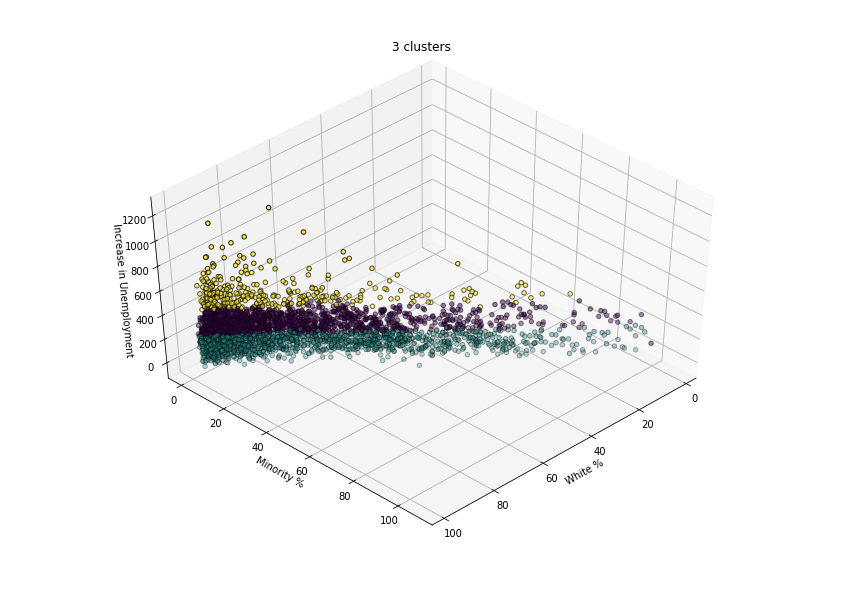

In [24]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

estimators = [
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ]

fignum = 1
titles = ['3 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(12, 8))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=45)
    est.fit(Y)
    labels = est.labels_

    ax.scatter(X[:, 20], X[:, 21], X[:, 22]
                ,c=labels.astype(np.float), edgecolor='k')
    #ax.scatter(0,0,0)
    #ax.scatter(100,100,0)

    ax.set_xlabel('White %')
    ax.set_zlabel('Increase in Unemployment')
    ax.set_ylabel('Minority %')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

    print(est.cluster_centers_)

fig.show()